# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

# Set UP our Data Frame We Will be Using

In [2]:
df_movie_info = pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t')

# Begin Cleaning of Data

In [3]:
df_movie_info['box_office'] = df_movie_info['box_office'].str.replace(',','').astype(float) # Set box office column as floats to perform mathematical operations on

In [4]:
df_movie_info = df_movie_info.dropna(subset=['box_office']) #Drop NA box office values
df_dropped_na = df_movie_info.dropna(subset=['box_office']) #Drop NA box office values and create new Data frame
df_dropped_na = df_dropped_na[df_dropped_na.rating != 'NR'] #Drop NR rows as they are of no use to us

# Percent of Films with Parental Rating and Box Office Info

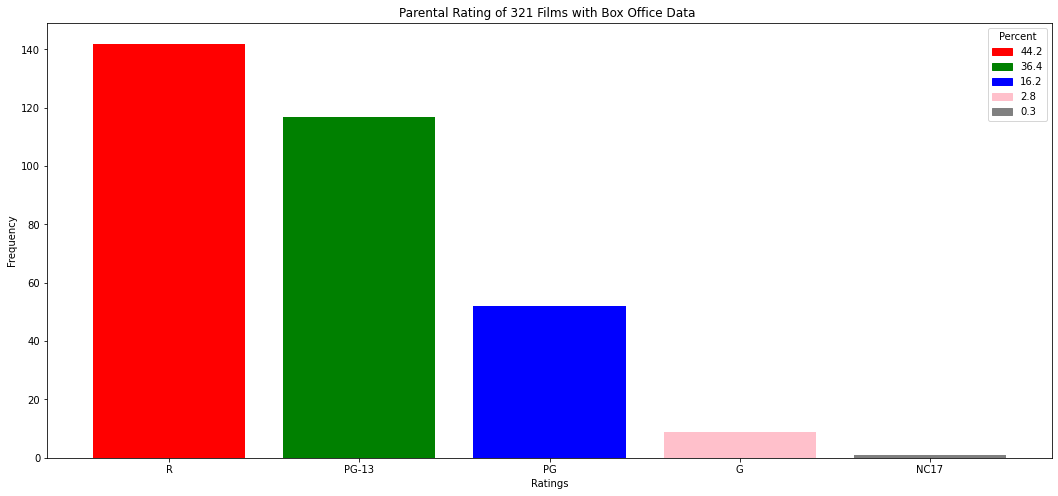

In [5]:
# Make our figure and set our x and y axis
fig , ax = plt.subplots(figsize=(18,8))

x = list(df_dropped_na.value_counts('rating').index)
height = list(df_dropped_na.value_counts('rating'))

#Different colors for easier visualizaion
color = ['red','green','blue','pink', 'grey', 'black']

ax.bar(x = x ,height = height,color=color)

ax.set_title('Parental Rating of 321 Films with Box Office Data ')
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')

#This creates our custom legend so we can find percent of our ratings

colors = {round((height[val]/len(df_dropped_na))*100,1) : color[val] for val in range(0,len(height))}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title='Percent');

plt.savefig('images/Rating_321_Films')

This shows the total distribution of ratings amongst the dataset, with the R category coming in first place. 

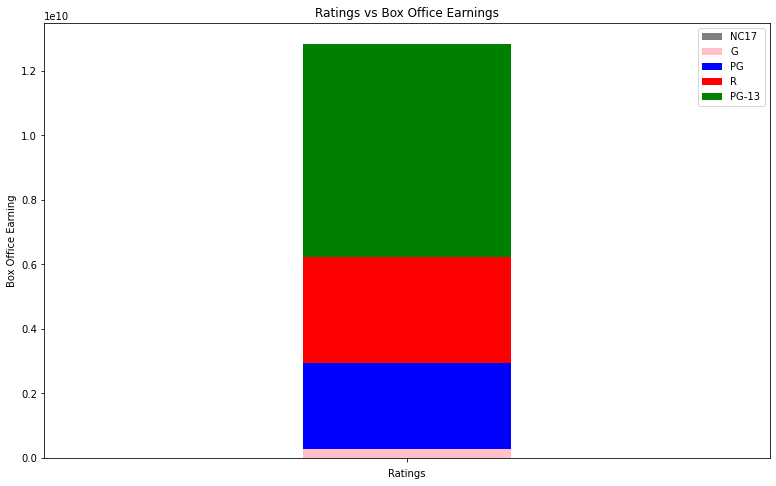

In [6]:
# Group our ratings and their total earnings
df_grouped = df_dropped_na.groupby('rating').sum()

# Get total of all box office earnings
df_total = df_grouped['box_office'].sum()

# Drop id column as it will not be used
df_grouped = df_grouped.drop('id',axis=1)

# Make numbers and ratings into list for easier manipulation
y = [x[0] for x in df_grouped.values]
x = df_grouped.index

# Turn into sorted dictionary to prepare for graph
d = {x[val] : y[val] for val in range(0,len(x))}
d_sort =pd.DataFrame(dict(sorted(d.items(),key= lambda x:x[1])),index=[''])

d_sort.plot(kind='bar',stacked=True, color = ['grey','pink','blue','red','green'],xlabel='Ratings',ylabel='Box Office Earning',title='Ratings vs Box Office Earnings',width=.2,figsize=(13,8));

plt.savefig('images/Ratings_v_Box_Office_Earnings')

# A dictionary with percent of earnings
d_avg = {percent[0] : (percent[1]/df_total)*100 for percent in d.items()}

So this is interesting. Even though the R rating is more popular in our data set, PG-13 dominates in overall earnings.

# Findings and Recommendations

From the data we were given, our recommendation is to make a movie with the PG-13 rating. Although the R rating is the most common in our dataset, the data shows it does not provide the strongest return. With the idea in mind we want our movie to perform well in the box office, the PG-13 rating has the highest chance to perform above average while having a lower chance of ending up in the bottom earnings at the box office.

# Genres in PG-13 Movies

Since we found that PG-13 movies have the highest box office earnings, now, let's look for which genres are popular in PG-13 movies.

### Clean the data

In [7]:
# Create new dataframe with just columns are needed
pg_13_genres = df_movie_info[['rating', 'genre']]

# Filter the dataframe so that we only get genres in PG-13 movies
pg_13_genres = pg_13_genres[pg_13_genres['rating'] == 'PG-13']

We see that there are multiple genres in a movie and some genres that are combined together.

In [8]:
# Replace ' and ' the string values from the genres column so that each genre is separated by the same syntax
pg_13_genres['genre'] = pg_13_genres['genre'].str.replace(' and ', '|')

Now, we should get each genre and see which genres are popular in PG-13 movies.

In [9]:
# Make a list of all the genres in the data
genres = list(pg_13_genres['genre'])

genre_list = []

# Separate the set of genres to individual genre and append it to a new list
# We go through each genres and split them by '|', resulting in list of genres for each movie
# Then, we go through the list of genres that were split and append them into a new list to get each individual genre
for genre in genres:
    each_genre = genre.split('|')
    for index in range(len(each_genre)):
        genre_list.append(each_genre[index])

genre_dict = {}

# Make a dictionary to count number of each genres
# For each genre, if the genre is in the dictionary, add a count to the value
# If not, then add a count to the value
for genre in genre_list:
    if genre in genre_dict.keys():
        genre_dict[genre] += 1
    else:
        genre_dict[genre] = 1

# Sort the dictionary by count
# We use lambda x while sorting so that we sort them by the values (x[1])
genre_dict = dict(sorted(genre_dict.items(), key=lambda x : x[1]))

## Visualization

Now we have the organized data that we need to see which genres are popular in PG-13 movies.

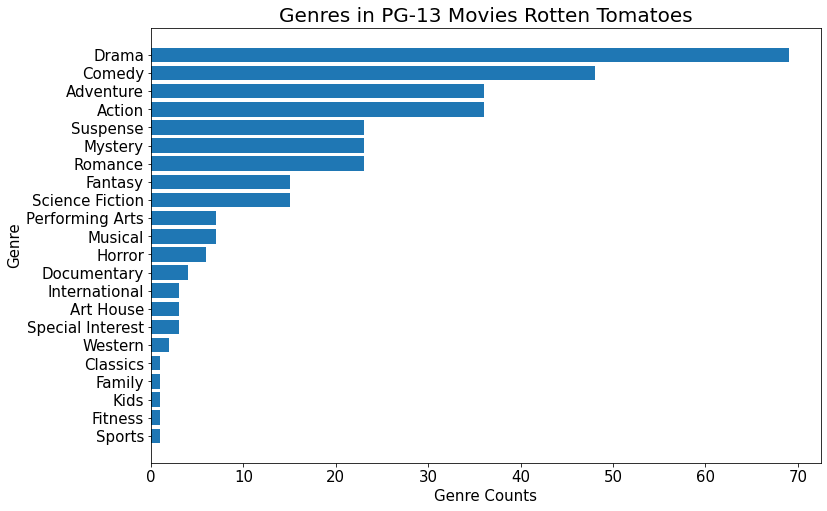

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
x = list(genre_dict.keys())
height = list(genre_dict.values())

ax.barh(x,height)
ax.set_title('Genres in PG-13 Movies Rotten Tomatoes', fontsize=20)
ax.set_xlabel('Genre Counts', fontsize=15)
ax.set_ylabel('Genre', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

plt.savefig('images/Genres_PG_13')

That is alot of genres! Let's look at the top 3 to in order to give a better recommendation.

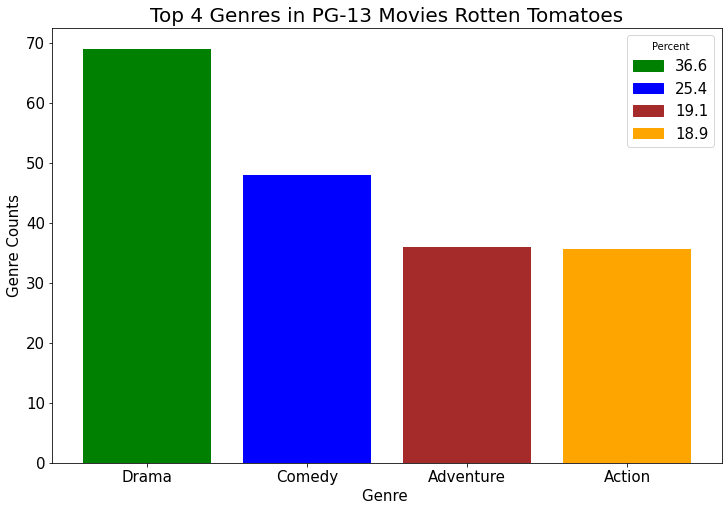

In [11]:
# Create figure to prepare for plot
fig, ax = plt.subplots(figsize=(12, 8))

# Sort Dictionary for better visual and resolve tie between action and adventrue genres
genre_dict['Action'] = float(35.7)
genre_dict = dict(sorted(genre_dict.items(), key=lambda x : x[1],reverse=True))

# Set parameters for our graph
x = list(genre_dict.keys())
height = list(genre_dict.values())
color = ['green','blue','brown','orange']

#Look at top 5 genres represented in dataset
ax.bar(x[:4], height[:4],color=color)

ax.set_title('Top 4 Genres in PG-13 Movies Rotten Tomatoes', fontsize=20)
ax.set_xlabel('Genre ', fontsize=15)
ax.set_ylabel('Genre Counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
colors = {round((height[val]/sum(height[:4]))*100,1) : color[val] for val in range(0,len(color[:4]))}        

labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title='Percent',fontsize=15);

plt.savefig('images/Top_4_RT')

We see that Drama, Comedy, Adventure, and Action are the most popular genres in PG-13 movies.
Let's see if the genres have a good average profit margin .

## Profit Margin

In [12]:
# Import necessary data to find profit margin
title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')

With the two data tables, we will merge them using movie title and year the movie was released so that we can have one dataframe with production budget, worldwide gross, and genres variables. There were movies with same title but were not the same movie. So, we also use the year to merge the table as well.

In [13]:
# Create a column for year in movie_budget table
# Since release date is in "month day, year" format, we are going to take only the last four string of the release date and 
# we are going to change the year to float
movie_budgets['release_year'] = movie_budgets['release_date'].str[-4:].astype(float)

#Combine movie_budget table with title_basics using movie title and released year
profit = movie_budgets.merge(title_basics, how='left', left_on=['movie', 'release_year'], right_on=['original_title', 'start_year'])
profit.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019.0,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015.0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018.0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",2007.0,NaN,NaN,NaN,NaN,NaN,NaN
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017.0,tt0974015,Justice League,Justice League,2017.0,120.0,"Action,Adventure,Fantasy"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",2015.0,tt2379713,Spectre,Spectre,2015.0,148.0,"Action,Adventure,Thriller"


### Clean Data

The dataframe now needs to be cleaned. We will drop any null values and duplicates from the data table.

In [14]:
# Drop null values
profit.dropna(inplace=True)

In [15]:
# Make a new dataframe with just the columns we need
condensed_profit = profit[['movie', 'genres', 'production_budget', 'domestic_gross', 'worldwide_gross']]

# Drop any duplicates
condensed_profit = condensed_profit.drop_duplicates(subset=['movie'])

# Change the columns that are string numbers to float
# First, we remove the , by replace , with ''
# Since the production budget, domestic gross, worldwide gross has a dollar sign in the front,
# we want to take every after the dollar sign and make them into floats
condensed_profit['production_budget'] = condensed_profit['production_budget'].str.replace(',', '').str[1:].astype(float)
condensed_profit['domestic_gross'] = condensed_profit['domestic_gross'].str.replace(',', '').str[1:].astype(float)
condensed_profit['worldwide_gross'] = condensed_profit['worldwide_gross'].str.replace(',', '').str[1:].astype(float)

Now, we will use wordwide_gross and production_budget to find the profit of the movie. We also found the net profit margin because we wanted to make sure that the movie generated enough profit from its sales and whether production budget was being contained.

In [16]:
condensed_profit['profit'] = condensed_profit['worldwide_gross'] - condensed_profit['production_budget']
condensed_profit['profit_margin'] = (condensed_profit['profit'] / condensed_profit['worldwide_gross']) * 100
condensed_profit

,movie,genres,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
1,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",410600000.0,241063875.0,1.045664e+09,6.350639e+08,60.733080
2,Dark Phoenix,"Action,Adventure,Sci-Fi",350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-133.703598
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",330600000.0,459005868.0,1.403014e+09,1.072414e+09,76.436443
6,Avengers: Infinity War,"Action,Adventure,Sci-Fi",300000000.0,678815482.0,2.048134e+09,1.748134e+09,85.352522
8,Justice League,"Action,Adventure,Fantasy",300000000.0,229024295.0,6.559452e+08,3.559452e+08,54.264473
...,...,...,...,...,...,...,...
5792,Emily,Drama,27000.0,3547.0,3.547000e+03,-2.345300e+04,-661.206654
5796,Exeter,"Horror,Mystery,Thriller",25000.0,0.0,4.897920e+05,4.647920e+05,94.895792
5800,Dutch Kills,"Crime,Drama,Thriller",25000.0,0.0,0.000000e+00,-2.500000e+04,-inf
5807,The Ridges,"Drama,Horror,Thriller",17300.0,0.0,0.000000e+00,-1.730000e+04,-inf


## Filtering our dataset ##

In [17]:
# Dropping anything with a negative profit margin, as we only want to see succesful films
filtered_df = condensed_profit[condensed_profit['profit_margin'] >= 0]
filtered_df

,movie,genres,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
1,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",410600000.0,241063875.0,1.045664e+09,6.350639e+08,60.733080
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",330600000.0,459005868.0,1.403014e+09,1.072414e+09,76.436443
6,Avengers: Infinity War,"Action,Adventure,Sci-Fi",300000000.0,678815482.0,2.048134e+09,1.748134e+09,85.352522
8,Justice League,"Action,Adventure,Fantasy",300000000.0,229024295.0,6.559452e+08,3.559452e+08,54.264473
9,Spectre,"Action,Adventure,Thriller",300000000.0,200074175.0,8.796209e+08,5.796209e+08,65.894399
...,...,...,...,...,...,...,...
5694,Another Earth,"Drama,Romance,Sci-Fi",175000.0,1321194.0,2.102779e+06,1.927779e+06,91.677680
5726,The Gallows,"Horror,Mystery,Thriller",100000.0,22764410.0,4.165647e+07,4.155647e+07,99.759941
5732,A Ghost Story,"Drama,Fantasy,Romance",100000.0,1594798.0,2.769782e+06,2.669782e+06,96.389608
5765,Tiny Furniture,"Comedy,Drama,Romance",50000.0,391674.0,4.241490e+05,3.741490e+05,88.211690


In [18]:
# Looking at the top 4 genres in the DF
filtered_df = filtered_df[(filtered_df['genres'].str.contains('Adventure')) | (filtered_df['genres'].str.contains('Comedy')) | (filtered_df['genres'].str.contains('Drama')) | (filtered_df['genres'].str.contains('Action'))]
filtered_df

,movie,genres,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
1,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",410600000.0,241063875.0,1.045664e+09,6.350639e+08,60.733080
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",330600000.0,459005868.0,1.403014e+09,1.072414e+09,76.436443
6,Avengers: Infinity War,"Action,Adventure,Sci-Fi",300000000.0,678815482.0,2.048134e+09,1.748134e+09,85.352522
8,Justice League,"Action,Adventure,Fantasy",300000000.0,229024295.0,6.559452e+08,3.559452e+08,54.264473
9,Spectre,"Action,Adventure,Thriller",300000000.0,200074175.0,8.796209e+08,5.796209e+08,65.894399
...,...,...,...,...,...,...,...
5667,Middle of Nowhere,Drama,200000.0,236806.0,2.368060e+05,3.680600e+04,15.542681
5687,Weekend,"Drama,Romance",190000.0,484592.0,1.577585e+06,1.387585e+06,87.956275
5694,Another Earth,"Drama,Romance,Sci-Fi",175000.0,1321194.0,2.102779e+06,1.927779e+06,91.677680
5732,A Ghost Story,"Drama,Fantasy,Romance",100000.0,1594798.0,2.769782e+06,2.669782e+06,96.389608


In [19]:
top4_genre = list(genre_dict.keys())[:4]
top4_genre

['Drama', 'Comedy', 'Adventure', 'Action']

## Inspecting the Genre Budgets ##

We've narrowed down our top-4 genres by profit margin.

Let's see what their budgets look like.

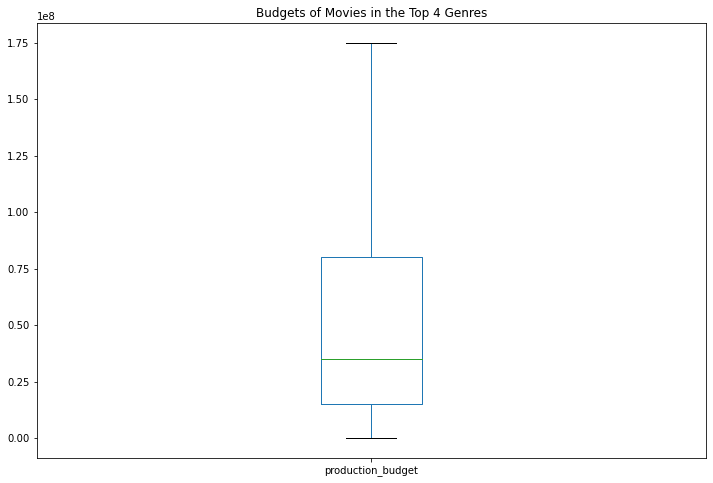

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
filtered_df.boxplot('production_budget', showfliers=False, ax=ax)
ax.grid(False)
ax.set_title('Budgets of Movies in the Top 4 Genres');

plt.savefig('images/filtered_df_boxplot')

We see that most of our data falls in the range of about 20 million to 80 million.

Let's divide our data into three subsets of datapoints using their budgets' Inter-Quartile Range (IQR).

In [21]:
# The below variables divide our DF into 3. Below the 25th percentile, above the 75th percentile, and between the two.

filt_25_percentile = filtered_df['production_budget'].quantile(.25)
filt_75_percentile = filtered_df['production_budget'].quantile(.75)
filtered_df_low = filtered_df[(filtered_df['production_budget'] < filt_25_percentile)]
filtered_df_mid = filtered_df[(filtered_df['production_budget'] >= filt_25_percentile) & (filtered_df['production_budget'] <= filt_75_percentile)]
filtered_df_high = filtered_df[(filtered_df['production_budget'] > filt_75_percentile)]

## Visualization ##

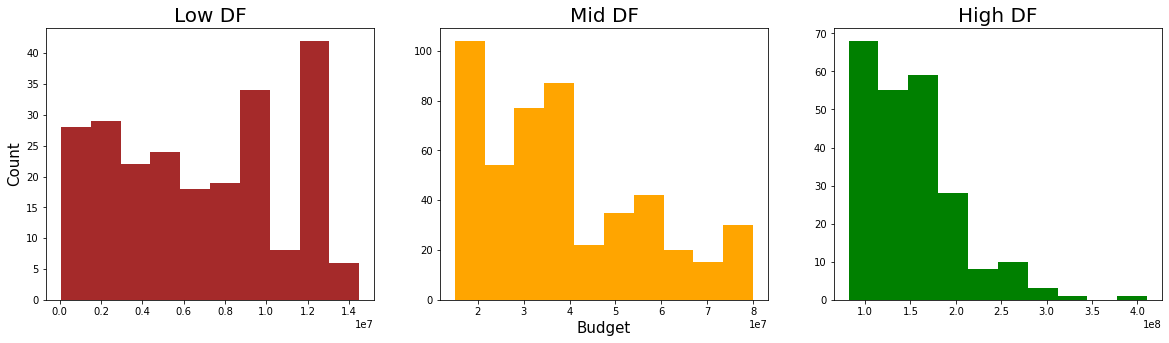

In [22]:
# Let's take a quick look at our new DataFrames

fig, axs = plt.subplots(1,3)
filtered_df_low['production_budget'].hist(ax=axs[0],figsize=(20,5),color='brown')
filtered_df_mid['production_budget'].hist(ax=axs[1],figsize=(20,5),color='orange')
filtered_df_high['production_budget'].hist(ax=axs[2],figsize=(20,5),color='green')
axs[0].set_title('Low DF',fontsize=20)
axs[0].set_ylabel('Count',fontsize=15)
axs[0].grid(False)
axs[1].set_title('Mid DF',fontsize=20)
axs[1].set_xlabel('Budget',fontsize=15)
axs[1].grid(False)
axs[2].set_title('High DF',fontsize=20);
axs[2].grid(False);

plt.savefig('images/Three_Data_Frames')

In [23]:
# Let's see if there are any good correlation indicators in these dataframes
display(filtered_df_low.corr(), filtered_df_mid.corr(), filtered_df_high.corr());

,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
production_budget,1.000000,0.424894,0.456602,0.380245,-0.064788
domestic_gross,0.424894,1.000000,0.801202,0.792792,0.491839
worldwide_gross,0.456602,0.801202,1.000000,0.996465,0.481316
profit,0.380245,0.792792,0.996465,1.000000,0.506485
profit_margin,-0.064788,0.491839,0.481316,0.506485,1.000000


,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
production_budget,1.000000,0.414626,0.482890,0.375059,-0.034667
domestic_gross,0.414626,1.000000,0.887887,0.883479,0.578005
worldwide_gross,0.482890,0.887887,1.000000,0.992869,0.567925
profit,0.375059,0.883479,0.992869,1.000000,0.605928
profit_margin,-0.034667,0.578005,0.567925,0.605928,1.000000


,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
production_budget,1.000000,0.506891,0.596141,0.476871,0.080869
domestic_gross,0.506891,1.000000,0.916689,0.914473,0.620604
worldwide_gross,0.596141,0.916689,1.000000,0.989992,0.693492
profit,0.476871,0.914473,0.989992,1.000000,0.745004
profit_margin,0.080869,0.620604,0.693492,0.745004,1.000000


We see that the high-budget dataframe has the best correlation from budget to profit/profit margin.

We'll analyze the best budgets to use for the respective genres in this dataframe.

In [24]:
# Finding the medians of the top-4 genres
adv_med = filtered_df_high[(filtered_df_high['genres'].str.contains('Adventure'))]
com_med = filtered_df_high[(filtered_df_high['genres'].str.contains('Comedy'))]
dram_med = filtered_df_high[(filtered_df_high['genres'].str.contains('Drama'))]
act_med = filtered_df_high[(filtered_df_high['genres'].str.contains('Action'))]
adv_med = int(adv_med['production_budget'].median())
com_med = int(com_med['production_budget'].median())
dram_med = int(dram_med['production_budget'].median())
act_med = int(act_med['production_budget'].median())

In [25]:
# Creating a dictionary of values to use for a visualization
high_df_dict = {'Action': act_med, 'Adventure': adv_med, 'Comedy': com_med, 'Drama': dram_med}
high_df_dict = dict(sorted(high_df_dict.items(), key=lambda x: x[1], reverse=True))
high_df_dict

{'Adventure': 150000000,
 'Action': 145000000,
 'Comedy': 130000000,
 'Drama': 120000000}

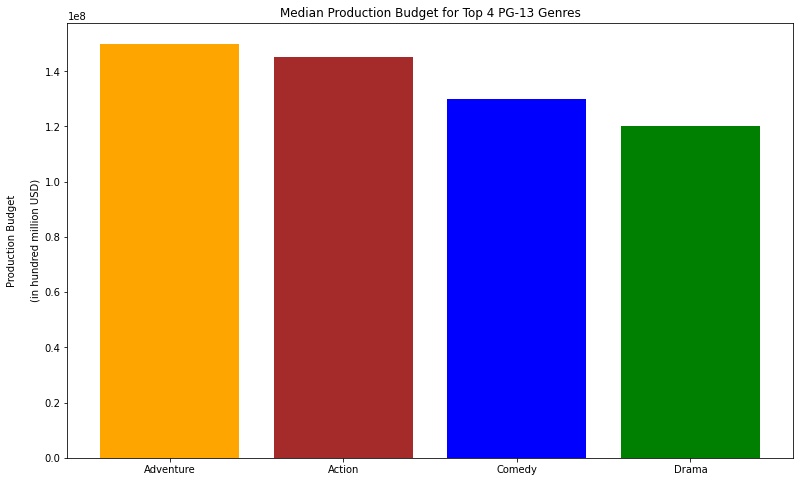

In [26]:
x = list(high_df_dict.keys())
fig, ax = plt.subplots(figsize=(13,8))
ax.bar(x=x,height=high_df_dict.values(),color=['orange','brown','blue','green'])
ax.set_ylabel('Production Budget\n\n(in hundred million USD)')
ax.set_title('Median Production Budget for Top 4 PG-13 Genres');

plt.savefig('images/Top_4_Medians')

The above graph shows the median range of 120 million to 150 million for the top-4 genres' production budgets.

## Conclusions ##

We analyzed several data sets to determine the following:

1. The best-rated movie for your profit-margin is PG-13.


2. Within that rating, the top 4 genres are (in descending order): Drama, Comedy, Adventure, Action.


3. A good budget-range when creating one of those films is \$120 million to \\$150 million.

There is still data to be analyzed, but this would be a good starting point for Micrsoft's film studio.